In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier


df = pd.read_csv("~/Downloads/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
d = []
for i in df['diagnosis']:
    if i == 'M':
        d.append(1)
    if i == 'B':
        d.append(0)
df['diagnosis_value'] = d

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_value
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [10]:
X = df.iloc[:,2:-2]  #independent columns/feature non target
y = df.iloc[:,-1]    #target column i.e price range

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02496746 0.01655205 0.07424447 0.05573355 0.01376714 0.02604766
 0.07142049 0.14990842 0.01433576 0.01182337 0.01861155 0.00494158
 0.04855458 0.01512333 0.00431792 0.00548092 0.00607891 0.0048666
 0.00841999 0.00666912 0.06574388 0.01725525 0.09780029 0.03600063
 0.01678636 0.03030935 0.06842066 0.06646673 0.007291   0.01206099]


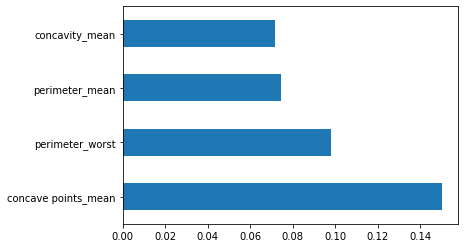

In [11]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(
    df[['perimeter_worst', 'concave points_mean', 'concavity_mean', 'perimeter_mean']], df['diagnosis_value'],
    train_size = .85, #berarti data untuk train sebanyak 85%
    test_size = .15 #berarti data untuk test sebanyak 15%
)

In [19]:
xTrain

,perimeter_worst,concave points_mean,concavity_mean,perimeter_mean
332,76.91,0.007583,0.005006,71.94
509,117.70,0.085200,0.203000,103.80
361,92.94,0.024240,0.033440,85.24
67,78.00,0.022300,0.037090,71.80
112,107.00,0.077980,0.300300,97.83
...,...,...,...,...
298,105.80,0.013740,0.024750,91.22
476,112.10,0.030580,0.050630,92.41
221,101.10,0.044510,0.078600,88.59
564,166.10,0.138900,0.243900,142.00


In [20]:
xTest

,perimeter_worst,concave points_mean,concavity_mean,perimeter_mean
454,91.62,0.02272,0.029660,80.62
113,72.62,0.03068,0.064760,68.64
355,89.02,0.04391,0.103000,81.92
277,129.00,0.05843,0.080200,120.90
542,107.40,0.03027,0.041050,94.70
...,...,...,...,...
219,180.20,0.06637,0.114500,128.00
226,73.47,0.01216,0.006643,66.62
257,119.80,0.12420,0.244800,103.20
98,82.96,0.03350,0.041960,74.34


In [21]:
yTrain

332    0
509    1
361    0
67     0
112    0
      ..
298    0
476    0
221    0
564    1
548    0
Name: diagnosis_value, Length: 483, dtype: int64

In [22]:
yTest

454    0
113    0
355    0
277    1
542    0
      ..
219    1
226    0
257    1
98     0
103    0
Name: diagnosis_value, Length: 86, dtype: int64